# Devoir 3 qui nécessite l'aide de petits pandas

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp

In [2]:
pd.set_option("display.float_format", lambda x : "%.2f" % x)

In [26]:
inv = pd.read_csv("inventory.csv")

Sur le portail de données ouvertes du Canada, je suis allé chercher un document .csv qui recense
tous les jeux de données ouvertes publiés sur le portail. Un projet bien circulaire, qui nous
donne une idée des services et des organismes gouvernementaux les plus enclins à dévoiler leurs
données. url:http://ouvert.canada.ca/data/fr/dataset/4ed351cf-95d8-4c10-97ac-6b3511f359b7

In [27]:
inv

,ref_number,title_en,title_fr,description_en,description_fr,publisher_en,publisher_fr,date_published,language,size,eligible_for_release,program_alignment_architecture_en,program_alignment_architecture_fr,date_released,portal_url_en,portal_url_fr,owner_org,owner_org_title
0,ODI-2016-00004,Lease Agreements,Ententes de location,"Lease agreements by property, area, cost unit ...","Ententes de location par propriété, coût unita...","Treasury Board of Canada Secretariat, Agricult...","Secrétariat du Conseil du Trésor du Canada, Ag...",1997-03-03,en+fr,50000,True,Real Property Services,Services de biens immobiliers,2016-09-24,http://open.canada.ca/data/en/dataset/08013e71...,http://ouvert.canada.ca/data/fr/dataset/08013e...,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
1,ODI-2016-00005,Index to Construction and Engineering Project ...,Index des plans des projets d’ingénierie et de...,Provides reference information on plans for co...,Fournit des renseignements sur les plans des p...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,NaN,en,0,True,Water Infrastructure,Infrastructure hydraulique,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
2,ODI-2016-00006,Contaminated Sites Inventory,Inventaire des sites contaminés,Provides data on all known AAFC contaminated s...,Contient des données sur tous les sites contam...,"Treasury Board of Canada Secretariat, Agricult...","Secrétariat du Conseil du Trésor du Canada, Ag...",2006-03-07,en+fr,10000,True,Real Property Services,Services de biens immobiliers,2016-09-24,http://open.canada.ca/data/en/dataset/1d42f7b9...,http://ouvert.canada.ca/data/fr/dataset/1d42f7...,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
3,ODI-2016-00007,Disclosure of Wrongdoing in the Workplace,Divulgation d’actes répréhensibles en milieu d...,List of founded cases of wrongdoing in the Agr...,Liste de cas fondés d’actes répréhensibles dan...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,2017-01-18,en+fr,0,True,Management and Oversight Services,Services de gestion et de surveillance,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
4,ODI-2016-00008,"Proactive disclosure for Contracts over $10,000",Divulgation proactive des marchés de plus de 1...,Provides data on contracts issued by or on beh...,Contient des renseignements sur les marchés co...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,2017-01-31,en+fr,0,True,Material Services,Services du matériel,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
5,ODI-2016-00009,Expenditures (Travel and Hospitality Expenses),Dépenses (frais de voyage et d’accueil),Provides information on the travel and hospita...,Fournit des renseignements sur les frais de vo...,"Agriculture and Agri-Food Canada, Treasury Boa...","Agriculture et Agroalimentaire Canada, Secréta...",2016-12-30,en+fr,10000,True,Financial Management Services,Services de gestion finances,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
6,ODI-2016-00013,Proactive Disclosure Data for Position Reclass...,Les données divulgation proactive pour reclass...,Provides the details about positions reclassi...,Fournit des détails sur les positions reclassé...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,2017-01-30,en+fr,0,True,Human Resources Management Services,Services de gestion des ressources humaines,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
7,ODI-2016-00014,AAFC IM/IT Investment Portfolio Report - Detai...,Rapport sur le portefeuille d’investissements ...,Provides a report on health of each project wi...,Fait le point sur l’état de santé de chaque pr...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,NaN,en,0,True,Management and Oversight Services,Services de gestion et de surveillance,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
8,ODI-2016-00016

Je tente de voir en un premier temps l'aspect initial des données que contient mon .csv.

In [28]:
inv.columns

Index(['ref_number', 'title_en', 'title_fr', 'description_en',
       'description_fr', 'publisher_en', 'publisher_fr', 'date_published',
       'language', 'size', 'eligible_for_release',
       'program_alignment_architecture_en',
       'program_alignment_architecture_fr', 'date_released', 'portal_url_en',
       'portal_url_fr', 'owner_org', 'owner_org_title'],
      dtype='object')

J'affiche les noms de colonnes par défaut. Ils me chicotent, car ils sont peu clairs.

In [30]:
inv.columns = ['numéro_demande', 'titre_ang', 'titre_fr', 'description_ang', 'description_fr', 'organisme_divulgateur_ang', 'organisme_divulgateur_fr', 'date-publication', 'langue', 'nombre_pages', 'divulgation_autorisée', 'programme_concerné_ang', 'programme_concerné_fr', 'date_divulgation', 'url_ang', 'url_fr', 'organisme_propriétaire_abrev', 'organisme_propriétaire']

Je redéfinis le nom des colonnes avec des propositions francisées et plus claires.

In [31]:
inv

,numéro_demande,titre_ang,titre_fr,description_ang,description_fr,organisme_divulgateur_ang,organisme_divulgateur_fr,date-publication,langue,nombre_pages,divulgation_autorisée,programme_concerné_ang,programme_concerné_fr,date_divulgation,url_ang,url_fr,organisme_propriétaire_abrev,organisme_propriétaire
0,ODI-2016-00004,Lease Agreements,Ententes de location,"Lease agreements by property, area, cost unit ...","Ententes de location par propriété, coût unita...","Treasury Board of Canada Secretariat, Agricult...","Secrétariat du Conseil du Trésor du Canada, Ag...",1997-03-03,en+fr,50000,True,Real Property Services,Services de biens immobiliers,2016-09-24,http://open.canada.ca/data/en/dataset/08013e71...,http://ouvert.canada.ca/data/fr/dataset/08013e...,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
1,ODI-2016-00005,Index to Construction and Engineering Project ...,Index des plans des projets d’ingénierie et de...,Provides reference information on plans for co...,Fournit des renseignements sur les plans des p...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,NaN,en,0,True,Water Infrastructure,Infrastructure hydraulique,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
2,ODI-2016-00006,Contaminated Sites Inventory,Inventaire des sites contaminés,Provides data on all known AAFC contaminated s...,Contient des données sur tous les sites contam...,"Treasury Board of Canada Secretariat, Agricult...","Secrétariat du Conseil du Trésor du Canada, Ag...",2006-03-07,en+fr,10000,True,Real Property Services,Services de biens immobiliers,2016-09-24,http://open.canada.ca/data/en/dataset/1d42f7b9...,http://ouvert.canada.ca/data/fr/dataset/1d42f7...,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
3,ODI-2016-00007,Disclosure of Wrongdoing in the Workplace,Divulgation d’actes répréhensibles en milieu d...,List of founded cases of wrongdoing in the Agr...,Liste de cas fondés d’actes répréhensibles dan...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,2017-01-18,en+fr,0,True,Management and Oversight Services,Services de gestion et de surveillance,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
4,ODI-2016-00008,"Proactive disclosure for Contracts over $10,000",Divulgation proactive des marchés de plus de 1...,Provides data on contracts issued by or on beh...,Contient des renseignements sur les marchés co...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,2017-01-31,en+fr,0,True,Material Services,Services du matériel,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
5,ODI-2016-00009,Expenditures (Travel and Hospitality Expenses),Dépenses (frais de voyage et d’accueil),Provides information on the travel and hospita...,Fournit des renseignements sur les frais de vo...,"Agriculture and Agri-Food Canada, Treasury Boa...","Agriculture et Agroalimentaire Canada, Secréta...",2016-12-30,en+fr,10000,True,Financial Management Services,Services de gestion finances,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
6,ODI-2016-00013,Proactive Disclosure Data for Position Reclass...,Les données divulgation proactive pour reclass...,Provides the details about positions reclassi...,Fournit des détails sur les positions reclassé...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,2017-01-30,en+fr,0,True,Human Resources Management Services,Services de gestion des ressources humaines,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
7,ODI-2016-00014,AAFC IM/IT Investment Portfolio Report - Detai...,Rapport sur le portefeuille d’investissements ...,Provides a report on health of each project wi...,Fait le point sur l’état de santé de chaque pr...,Agriculture and Agri-Food Canada,Agriculture et Agroalimentaire Canada,NaN,en,0,True,Management and Oversight Services,Services de gestion et de surveillance,NaN,NaN,NaN,aafc-aac,Agriculture and Agri-Food Canada 

In [24]:
inv.organisme_divulgateur_fr.value_counts()

Statistique Canada                                                                   6562
Agriculture et Agroalimentaire Canada                                                 347
Ressources naturelles Canada                                                          296
Services publics et Approvisionnement Canada                                          242
Transports Canada                                                                     168
Citoyenneté et Immigration Canada                                                     157
Service correctionnel Canada (SCC)                                                    123
Pêches et Océans Canada                                                               113
Emploi et Développement social Canada                                                 108
Conseil de recherches en sciences naturelles et en génie du Canada                     78
Secrétariat du conseil du trésor                                                       73
Santé Cana

Avec la fonction "value_counts" appliquée à la colonne "organisme_divulgateur_fr", je peux afficher en ordre décroissant le nombre de jeux de données que chaque organisme gouvernemental fédéral a divulgué. C'est intéressant de voir quels organismes sont les plus transparents en matière de divulgation.

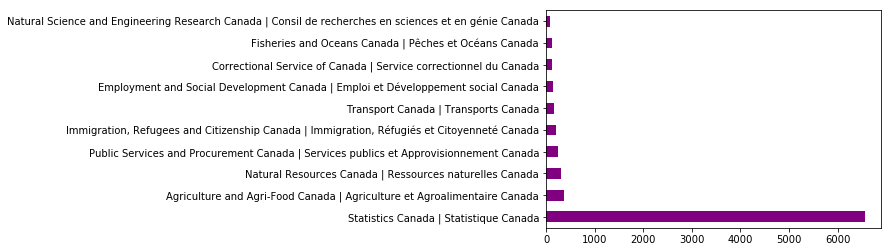

In [32]:
inv.organisme_propriétaire.value_counts().head(10).plot(kind="barh", color="purple")

En utilisant la fonction .plot(kind="barh"), je peux créer un graphique à bandes qui me permet de visualiser rapidement les données évaluées. Ici, je l'ai ajoutée à la suite de fonctions "value_counts().head(10)" telle qu'appliquée à la colonne "organisme_propriétaire", ce qui me permet d'afficher les dix organismes gouvernementaux qui ont été le plus concernés par les jeux de données divulgués sur le portail. Il est donc intéressant de constater visuellement si les organismes propriétaires des données les plus concernés sont également ceux qui divulguent le plus de jeux de données. Le graphique ci-haut suggère que c'est le cas.

In [44]:
fra = inv.langue == "fr"

Je crée la variable "fra" et lui associe tous les jeux de données unilingues francophones, c'est-à-dire ceux dont la colonne "langue" correspond à la valeur "fr".

In [45]:
inv[fra]

,numéro_demande,titre_ang,titre_fr,description_ang,description_fr,organisme_divulgateur_ang,organisme_divulgateur_fr,date-publication,langue,nombre_pages,divulgation_autorisée,programme_concerné_ang,programme_concerné_fr,date_divulgation,url_ang,url_fr,organisme_propriétaire_abrev,organisme_propriétaire
778,ODI-2016-00007,Statistics on Recognition Award offered to emp...,Statistiques concernant les prix de reconnaiss...,Statistics of costs and the number of recipien...,Statistiques des coûts et du nombre de récipie...,Canadian Space Agency,Agence spatiale canadienne,NaN,fr,45,True,Internal Services,Services internes,NaN,NaN,NaN,csa-asc,Canadian Space Agency | Agence spatiale canadi...
1770,ODI-2016-00582,MicroSIGEB,MicroSIGEB,Database containing data associated with proje...,Base de données regroupant les données associé...,Natural Resources Canada,Ressources naturelles Canada,NaN,fr,62914560,True,2. Natural Resources Sectors and Consumers are...,2. Les secteurs des ressources naturelles et l...,NaN,NaN,NaN,nrcan-rncan,Natural Resources Canada | Ressources naturell...
1771,ODI-2016-00585,Lake Edouard Experimental Forest (La Mauricie ...,Forêt expérimentale du Lac Édouard (Parc de la...,The Lake Edouard Experimental Forest was offic...,La Forêt expérimentale du Lac Édouard a été of...,Natural Resources Canada,Ressources naturelles Canada,NaN,fr,272629760,True,2. Natural Resources Sectors and Consumers are...,2. Les secteurs des ressources naturelles et l...,NaN,NaN,NaN,nrcan-rncan,Natural Resources Canada | Ressources naturell...
1773,ODI-2016-00691,Soils database,Base de données des sols,Soil analysis database...,La base de données sur les sols est une base d...,Natural Resources Canada,Ressources naturelles Canada,NaN,fr,78643200,True,2. Natural Resources Sectors and Consumers are...,2. Les secteurs des ressources naturelles et l...,NaN,NaN,NaN,nrcan-rncan,Natural Resources Canada | Ressources naturell...
1774,ODI-2016-00692,LFC observation areas,Aires d'observation du CFL,"From 1947 to 1954, the Canadian Forest Service...","De 1947 à 1954, le Service canadien des forêts...",Natural Resources Canada,Ressources naturelles Canada,NaN,fr,272629760,True,2. Natural Resources Sectors and Consumers are...,2. Les secteurs des ressources naturelles et l...,NaN,NaN,NaN,nrcan-rncan,Natural Resources Canada | Ressources naturell...
8911,OD-2016-0181,REGISTER OF RECYCLING FEES - CIVIL AVIATION,REGISTRE DES FRAIS RÉCUPÉRABLES - AVIATION CIVILE,Frais réclamés aux compagnies pour services re...,Fees charged to companies for the work done b...,Transport Canada,Transports Canada,NaN,fr,0,True,3.1 Aviation Safety,3.1 Sécurité Aérienne,NaN,NaN,NaN,tc,Transport Canada | Transports Canada
8913,OD-2016-0183,QUALITY ASSURANCE PLANNING,PLANIFICATION DE L'ASSURANCE QUALITÉ,This bank contains information about self-asse...,Ce fichier contient de l'information au sujet ...,Transport Canada,Transports Canada,NaN,fr,0,True,3.1 Aviation Safety,3.1 Sécurité Aérienne,NaN,NaN,NaN,tc,Transport Canada | Transports Canada
8915,OD-2016-0185,Monthly report for unclosed PVI,Rapport sur les IVP non fermées,This file contains the description of the step...,Ce fichier contient la description des étapes ...,Transport Canada,Transports Canada,NaN,fr,0,True,3.1 Aviation Safety,3.1 Sécurité Aérienne,NaN,NaN,NaN,tc,Transport Canada | Transports Canada
8916,OD-2016-0186,CADORS follow-ups monthly report,Suivis CADORS mensuels région du Québec,This file contains CADORS follow-ups that have...,Ce fichier contient les suivis CADORS mensuels...,Transport Canada,Transports Canada,NaN,fr,0,True,3.1 Aviation Safety,3.1 Sécurité Aérienne,NaN,NaN,NaN,tc,Transport Canada | Transports Canada
8917,OD-2016-0187,Risk Assessment tracking report,Grille de suivi des gestions de risque,This file contains risk assessments follow-ups...,Ce fichier contient le suivi des gestions de r...,Transport Canada,Transports Canada,NaN,fr,0,True,3.1 Aviation Safety,3.1 Sécurité Aérienne,NaN,NaN,NaN,tc,Tran

Ici, j'affiche seulement les demandes unilingues francophones pour étudier les tendances lourdes et pour constater si certains organismes sont plus portés que d'autres à divulguer des jeux de données qui sont seulement en anglais.

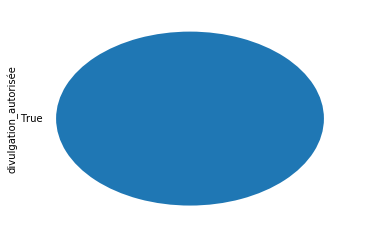

In [48]:
inv.divulgation_autorisée.value_counts().plot(kind="pie")

Ici, je voulais voir si l'ensemble des jeux de données concernés portaient la mention "True" dans la colonne "divulgation_autorisée". Le contraire m'aurait beaucoup étonné, mais je voulais voir s'il y avait des sous-statuts possibles qui auraient référé à des divulgations partielles ou conditionnelles dans cette colonne. Le diagramme circulaire suivant nous indique que 100% des données du tableau sont catégorisées de façon similaire dans la colonne "divulgation_autorisée".